In [90]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
# from inchworm_measurement import simulator
from inchworm_measurement.simulator import Simulator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


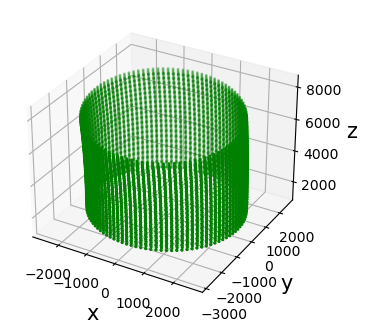

2043.769910464584


In [91]:
sigma = 0.00489 # size of pixel [mm] (nikon D800)
focal = 8 # length of focal [mm] (NIKKOR 8-15mm f/3.5-4.5E)

A = np.array([ \
    [focal/sigma, 0, 0],\
    [0, focal/sigma, 0],\
    [0, 0, 1]\
])
base_motion= np.array([
    [[1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 100*i],
    [0, 0, 0, 1]] for i in range(1000)]
)
spotlaser_offset= np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1000],
    [0, 0, 0, 1]
])
ringlaser_offset = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 1500],
    [0, 0, 0, 1]
])


simulator_params = {\
    "A": A, \
    "n_spot": 7, \
    "n_ring": 100, \
    "cylinder_radius": 2500, \
    "base_motion": base_motion, \
    "spotlaser_offset": spotlaser_offset, \
    "ringlaser_offset": ringlaser_offset, \
    "is_ring_with_camera": True, \
    "idx_length": 100,
    "idx_period": 5,
    "round_threshold": 0.5, \
    "is_bundle": False, \
    "is_5points_true": False, \
    "is_scale_true": False, \
}

loop_size = [5]
spot_offset_z = [200]
S = Simulator()
S.set_params(**simulator_params)
S.run()
S.show_result()
S.calc_error()

print(S.error)

In [76]:
base_motion[0]

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [47]:
base_motion = np.array([
    [[1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 100*i],
    [0, 0, 0, 1]] for i in range(3)]
)

In [50]:
base_motion[1,:,:]

array([[  1,   0,   0,   0],
       [  0,   1,   0,   0],
       [  0,   0,   1, 100],
       [  0,   0,   0,   1]])

In [43]:
A = np.zeros((4,4))
B = np.ones((4,4))
C = np.array([A,B])
C[0]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [44]:
C[1]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])